<a href="https://colab.research.google.com/github/AlirezaSamari/DeepLearning-Pytorch-fastai-/blob/main/04_MNIST_Classifier_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
from fastcore import *

In [2]:
path = untar_data(URLs.MNIST)

In [3]:
(path).ls()

(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

In [4]:
Image.open((path/'training'/'8').ls()[2])

##Data preparation

In [5]:
block = DataBlock(blocks = [ImageBlock, CategoryBlock], get_items=get_image_files,
                  splitter=RandomSplitter(valid_pct=0.2, seed=42), get_y = parent_label,
                  batch_tfms=aug_transforms(mult=2., do_flip=False))

In [6]:
loaders = block.dataloaders(path/'training', bs=64)

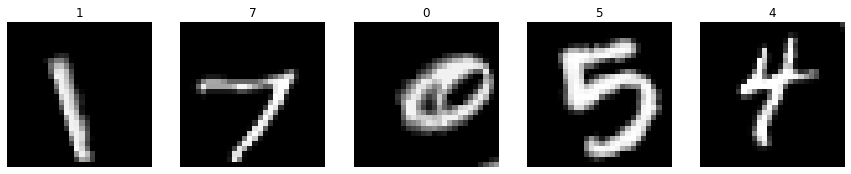

In [7]:
loaders.train.show_batch(max_n=5,nrows = 1)

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
learn = vision_learner(loaders, resnet34, metrics=accuracy, path='/content/gdrive/My Drive/fastai/')

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

SuggestedLRs(valley=0.002511886414140463)

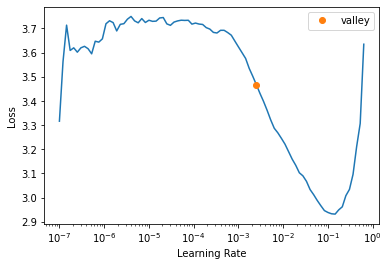

In [11]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,1.207565,0.698542,0.774083,01:21


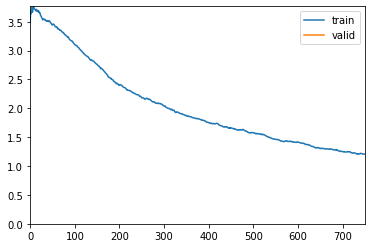

epoch,train_loss,valid_loss,accuracy,time
0,0.437308,0.176500,0.946083,01:30
1,0.262972,0.095160,0.971833,01:29
2,0.170013,0.062634,0.981250,01:28
3,0.154766,0.042742,0.985667,01:28
4,0.124168,0.041923,0.987250,01:28
5,0.090770,0.035300,0.988250,01:27
6,0.078342,0.035241,0.988833,01:28
7,0.080106,0.029365,0.990417,01:31
8,0.066354,0.025629,0.992417,01:27
9,0.066484,0.024757,0.992833,01:29


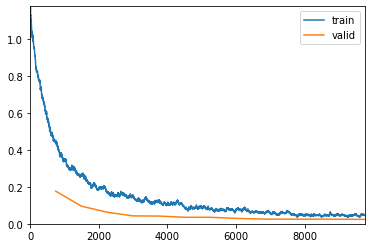

In [12]:
learn.fine_tune(13, base_lr=0.0014, cbs=[ShowGraphCallback()])

In [13]:
learn.export("MNIST_Classifier_fastai.pkl")

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

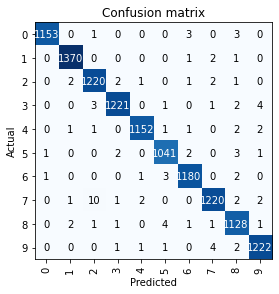

In [15]:
interp.plot_confusion_matrix()

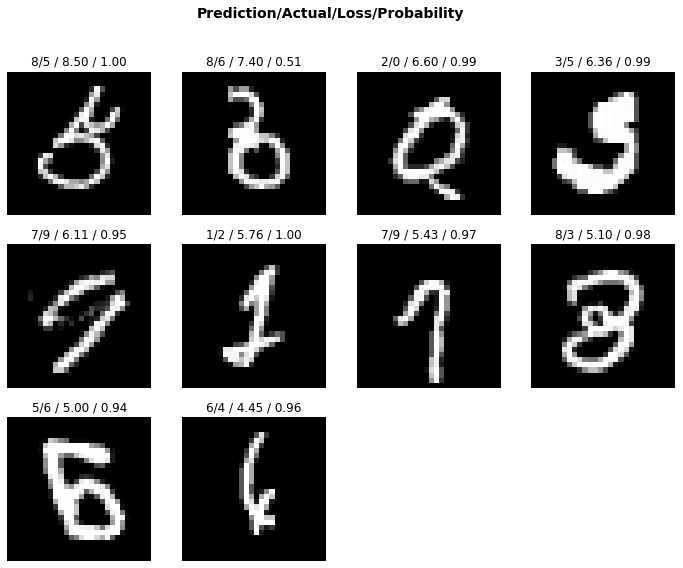

In [16]:
interp.plot_top_losses(10)